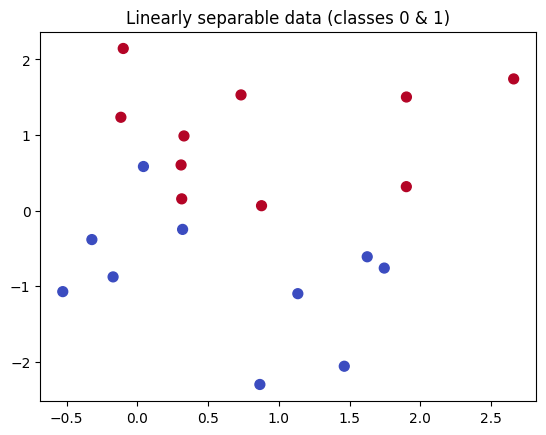

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import confusion_matrix, RocCurveDisplay
from sklearn.preprocessing import StandardScaler

np.random.seed(1)
X = np.random.randn(20, 2)
y = np.array([0]*10 + [1]*10)

X[y == 1] += 1

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, s=50)
plt.title("Linearly separable data (classes 0 & 1)")
plt.show()


In [2]:

def plot_svc(clf, X, y):
    plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.coolwarm, s=50)
    
    # grid for decision boundary
    ax = plt.gca()
    xx, yy = np.meshgrid(np.linspace(*ax.get_xlim(), 30),
                         np.linspace(*ax.get_ylim(), 30))
    
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    plt.contour(xx, yy, Z, colors='k', levels=[-1,0,1], alpha=0.5, linestyles=['--','-','--'])
    
    # support vectors
    plt.scatter(clf.support_vectors_[:,0], clf.support_vectors_[:,1], facecolors='none', edgecolors='k', s=100, linewidth=1)
    plt.show()

def plot_svc_multiclass(clf, X, y):
    xx, yy = np.meshgrid(np.linspace(X[:,0].min()-1, X[:,0].max()+1, 200),
                         np.linspace(X[:,1].min()-1, X[:,1].max()+1, 200))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.coolwarm, s=50)
    plt.title("SVM decision regions")
    plt.show()


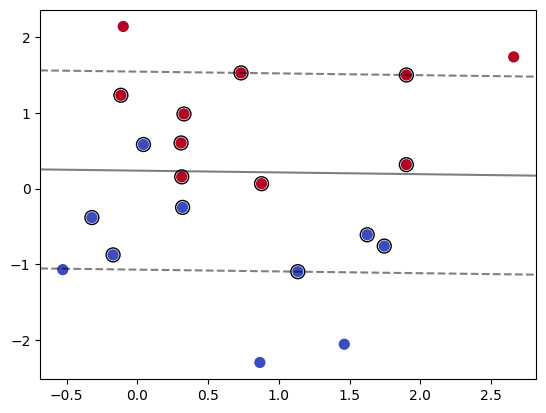

In [4]:
clf_small = SVC(kernel='linear', C=0.1)
clf_small.fit(X, y)
plot_svc(clf_small, X, y)


In [5]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
grid = GridSearchCV(SVC(kernel='linear'), param_grid, cv=5)
grid.fit(X, y)
print("Best parameters:", grid.best_params_)


X_test = np.random.randn(20, 2)
y_test = np.random.choice([-1, 1], size=20)
X_test[y_test == 1] += 1

best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))



Best parameters: {'C': 0.001}
Confusion matrix:
 [[ 0  7  3]
 [ 0  0  0]
 [ 0  0 10]]


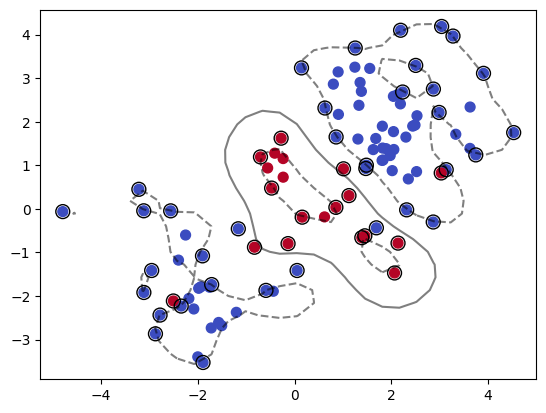

In [6]:
# RBF
np.random.seed(1)
X = np.random.randn(200, 2)
X[:100] += 2
X[100:150] -= 2
y = np.array([1]*150 + [2]*50)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=100, random_state=1)
clf_rbf = SVC(kernel='rbf', gamma=1, C=1)
clf_rbf.fit(X_train, y_train)
plot_svc(clf_rbf, X_train, y_train)


In [7]:
# gridSearch for RBF
param_grid_rbf = {'C': [0.1, 1, 10, 100], 'gamma': [0.5, 1, 2, 3, 4]}
grid_rbf = GridSearchCV(SVC(kernel='rbf'), param_grid_rbf, cv=5)
grid_rbf.fit(X_train, y_train)
print("Best RBF params:", grid_rbf.best_params_)

# predictions for RBF
best_rbf = grid_rbf.best_estimator_
y_test_pred = best_rbf.predict(X_test)
print("Confusion matrix (RBF):\n", confusion_matrix(y_test, y_test_pred))





Best RBF params: {'C': 1, 'gamma': 0.5}
Confusion matrix (RBF):
 [[70  0]
 [10 20]]


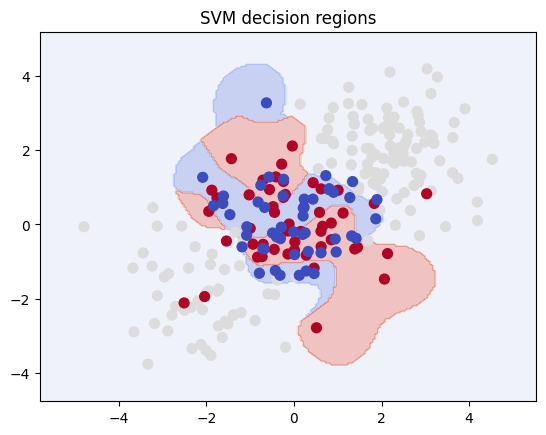

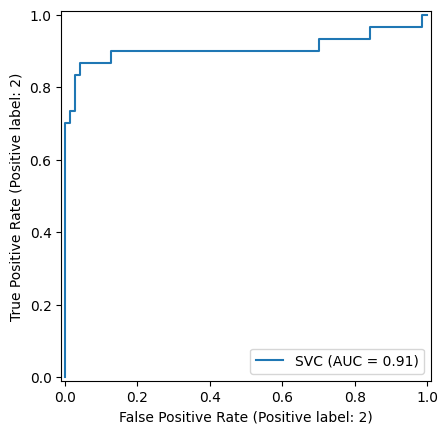

In [8]:
# multi-class SVM
X_multi = np.vstack([X, np.random.randn(50, 2)])
y_multi = np.concatenate([y, np.zeros(50)])
clf_multi = SVC(kernel='rbf', C=10, gamma=1)
clf_multi.fit(X_multi, y_multi)
plot_svc_multiclass(clf_multi, X_multi, y_multi)


# ROC curve
clf_bin = SVC(kernel='rbf', gamma=2, C=1, probability=True)
clf_bin.fit(X_train, y_train)
RocCurveDisplay.from_estimator(clf_bin, X_test, y_test)
plt.show()
